<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Display basic structure
print(df.shape)   
print(df.info())  
print(df.head(3)) 

(65437, 114)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   

                                           EdLevel  \
0                        Primary/elementary school   
1     

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top 10 columns with most missing values:")
print(missing.head(10))

# Example: drop rows with all NaN
df = df.dropna(how="all")

# Example: fill numeric with mean, categorical with mode
num_cols = df.select_dtypes(include=["float64","int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Top 10 columns with most missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
# Employment column distribution
print(df["Employment"].value_counts(dropna=False))

# JobSat distribution
print(df["JobSat"].value_counts(dropna=False))

# YearsCodePro distribution
print(df["YearsCodePro"].value_counts(dropna=False))


Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


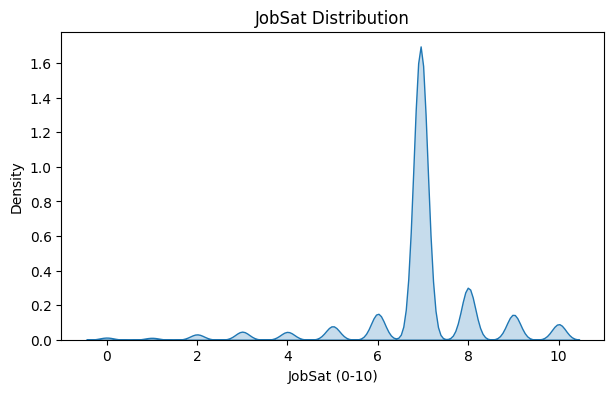

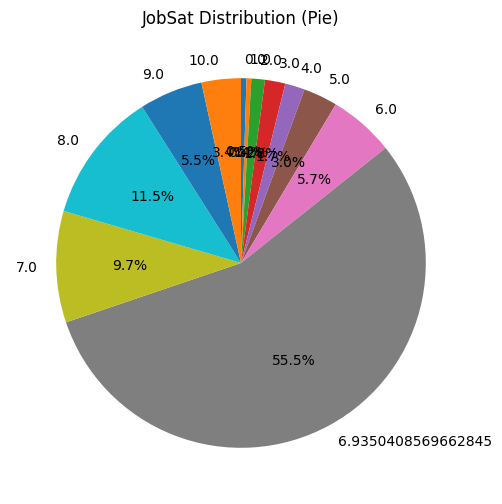

In [6]:
# KDE plot (smooth distribution)
plt.figure(figsize=(7,4))
sns.kdeplot(df["JobSat"].dropna(), fill=True)
plt.title("JobSat Distribution")
plt.xlabel("JobSat (0-10)")
plt.ylabel("Density")
plt.show()

# Optional: pie chart (can be cluttered with many slices)
job_counts = df["JobSat"].value_counts().sort_index()
plt.figure(figsize=(6,6))
job_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("JobSat Distribution (Pie)")
plt.ylabel("")
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


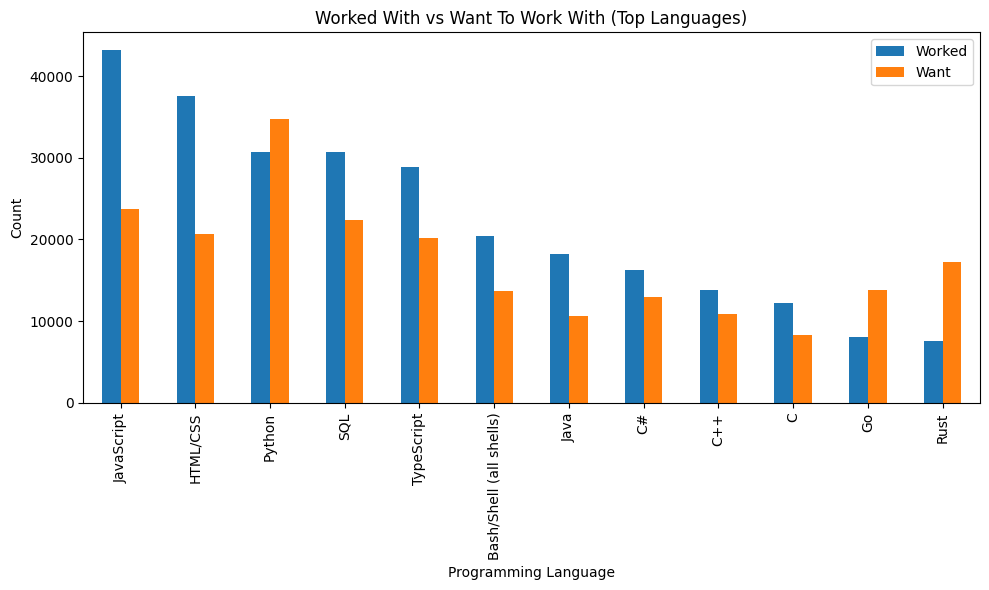

In [8]:
# Explode multi-value columns (split by ;)
worked = df["LanguageHaveWorkedWith"].dropna().str.split(";").explode().str.strip()
want   = df["LanguageWantToWorkWith"].dropna().str.split(";").explode().str.strip()

# Frequency counts
cnt_worked = worked.value_counts()
cnt_want   = want.value_counts()

# Union of top languages from both lists
top_langs = pd.Index(cnt_worked.head(10).index).union(cnt_want.head(10).index)

# Combine into one table
comp = pd.DataFrame({
    "Worked": cnt_worked.reindex(top_langs).fillna(0).astype(int),
    "Want":   cnt_want.reindex(top_langs).fillna(0).astype(int)
}).sort_values("Worked", ascending=False)

# Grouped bar chart
comp.plot(kind="bar", figsize=(10,6))
plt.title("Worked With vs Want To Work With (Top Languages)")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()




### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


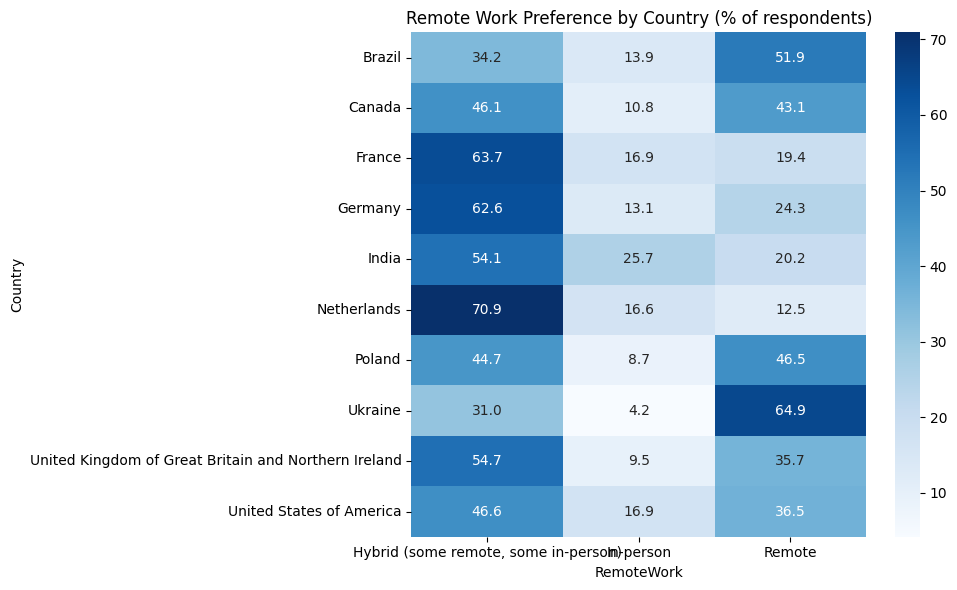

In [9]:
# Pick top N countries by respondent count
top_countries = df["Country"].value_counts().head(10).index
subset = df[df["Country"].isin(top_countries)]

# Row-normalized crosstab (% within country)
ct = pd.crosstab(subset["Country"], subset["RemoteWork"], normalize="index") * 100

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Remote Work Preference by Country (% of respondents)")
plt.xlabel("RemoteWork")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# (Optional) stacked bar alternative
# ct.plot(kind="bar", stacked=True, figsize=(10,6))
# plt.title("Remote Work Preference by Country (% of respondents)")
# plt.ylabel("Percent")
# plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson: 0.070213530259255
Spearman: 0.1512178573487489


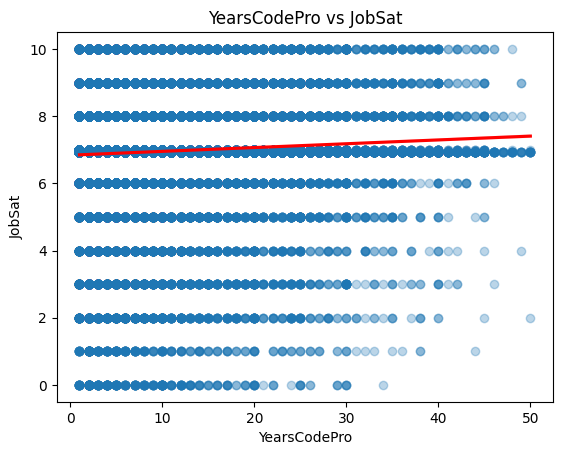

In [15]:


df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")
s = df[["YearsCodePro", "JobSat"]].dropna()

print("Pearson:", s["YearsCodePro"].corr(s["JobSat"]))
print("Spearman:", s["YearsCodePro"].rank().corr(s["JobSat"].rank()))

sns.regplot(data=s, x="YearsCodePro", y="JobSat",
            scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("YearsCodePro vs JobSat"); plt.xlabel("YearsCodePro"); plt.ylabel("JobSat"); plt.show()




### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_656/250273443.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


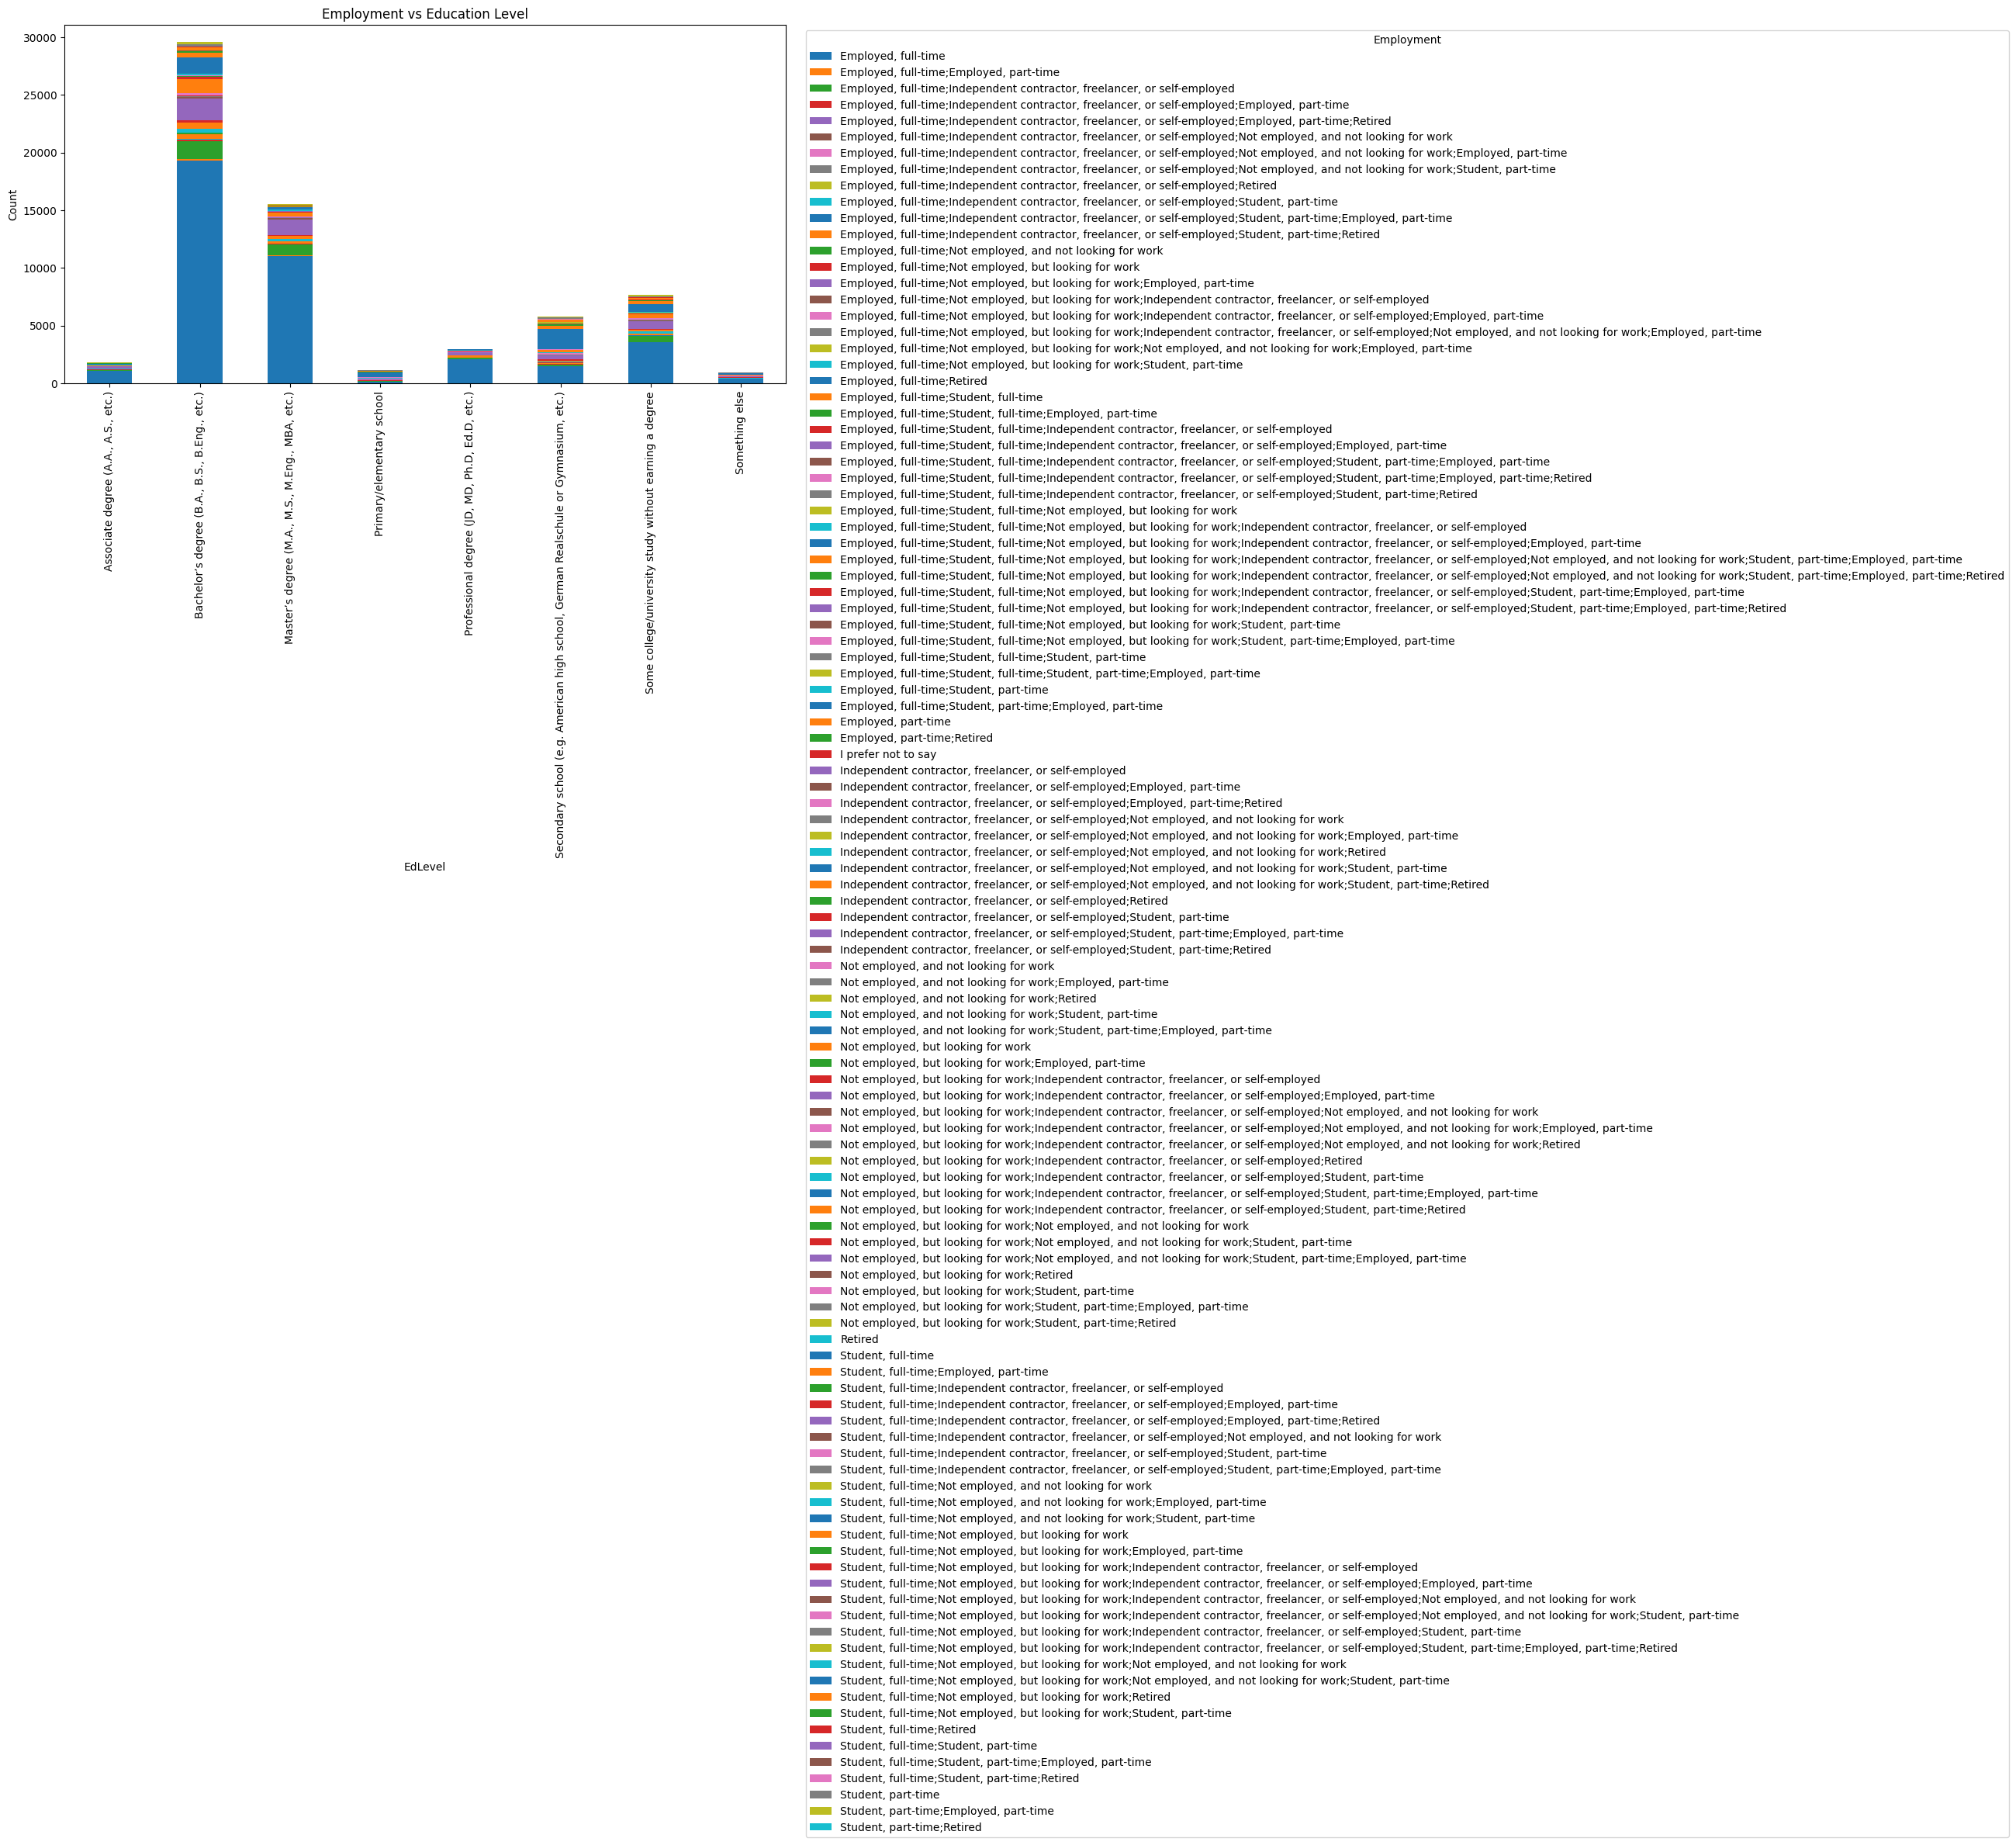

In [17]:
ct = pd.crosstab(df["EdLevel"], df["Employment"])
ct.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Employment vs Education Level"); plt.xlabel("EdLevel"); plt.ylabel("Count")
plt.legend(title="Employment", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [18]:
df.to_csv("cleaned_eda_dataset.csv", index=False)
print("Saved to cleaned_eda_dataset.csv")


Saved to cleaned_eda_dataset.csv


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
